In [2]:
import torch
import torch.nn as nn                           # neural network
import torch.optim as optim                     # package implementing various optimization algorithms
import torchvision
import torchvision.transforms as transforms
import cv2                                      # OpenCV
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
# from NetworkClass import ANN
from NetworkClass import CNN

In [3]:
# load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(trainset, batch_size=64, shuffle=True)
test_loader = DataLoader(testset, batch_size=64, shuffle=False)

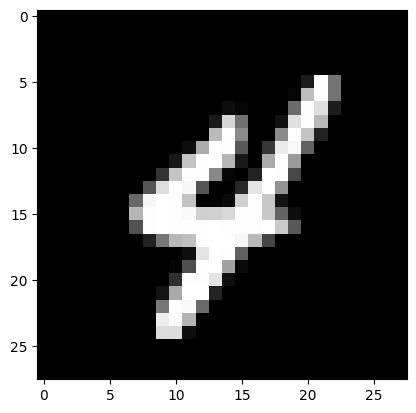

In [4]:
# Show data
images, labels = next(iter(train_loader))
images.shape
plt.imshow(images[63].reshape(28,28), cmap="gray")

In [6]:
# train model
model = CNN()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 10
for epoch in range(epochs):
    model.train()
    run_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        output = model(images)
        loss = loss_fn(output, labels)
        loss.backward()
        optimizer.step()
        run_loss += loss.item()
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {run_loss/len(train_loader):.4f}')


Epoch [1/10], Loss: 0.1984
Epoch [2/10], Loss: 0.0847
Epoch [3/10], Loss: 0.0660
Epoch [4/10], Loss: 0.0561
Epoch [5/10], Loss: 0.0457
Epoch [6/10], Loss: 0.0413
Epoch [7/10], Loss: 0.0363
Epoch [8/10], Loss: 0.0330
Epoch [9/10], Loss: 0.0287
Epoch [10/10], Loss: 0.0300


In [7]:
# Test model
correct = 0
total = 0
model.eval()

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
print('Accuracy: {:.2f}%'.format(100 * correct / total))

Accuracy: 99.07%


In [8]:
torch.save(model, "model.pth")